<h1 style="color:#1a96f6;"> <center> <b>

MIT License

Copyright (c) 2023 Felipe Braz da Silva e Maria Eduarda Pereira

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
Projeto Final- Softex
</b> </center> </h1>

<div class="alert alert-info">
    
<h1 style="color:#1a96f6;"> <center> <b>
Projeto Final- Inteligência Artificial
</b> </center> </h1>
    
<h3 style="color:#1a96f6;"> <center> <b>
Machine Learning
</b></center> </h3>
    
<h3 style="color:#1a96f6;"> <center> <b>
Prof. Dr. Marcelo José Siqueira Coutinho de Almeida
</b></center> </h3>

<h3 style="color:#1a96f6;"> <center> <b>
Discentes: Felipe Braz da Silva
</b></center> </h3>

<h3 style="color:#1a96f6;"> <center> <b>
           Maria Eduarda Pereira
</b></center> </h3>

<h3 style="color:#1a96f6;"> <center> <b>
Data: 13/12/2023
</b></center> </h3>


</div>

**Descrição:**
Grande parte dos alunos egressos de cursos superiores tem como objetivo ingressar em algum programa de pós-graduação a fim de se tornarem Mestres em suas respectivas áreas do conhecimento. O processo de seleção realizado em cada universidade faz uso de uma quantidade considerável de parâmetros, alguns deles bastante subjetivos. Sendo assim, um modelo baseado em aprendizado de máquina pode ser de grande importância tanto para o corpo docente envolvido na seleção como para os alunos que desejam participar do processo.  

#Trabalhando com Aprendizagem Supervisionada-Regressão

###Carregando os dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/felipebrazfb333/Machine-learning/master/datasets/Admission_Predict.csv")
dataset.head(15)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


##Análise Exploratória dos dados


Analisando os dados para compreendê-los e visualizá-los de forma mais clara.


In [ ]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
#quantidade de valores únicos para cada coluna do dataset
dataset.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [ ]:
#Verificando informações de dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
#medidas estatísticas básicas
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000



Utilizando o boxplot para uma visualização concisa da distribuição dos dados.


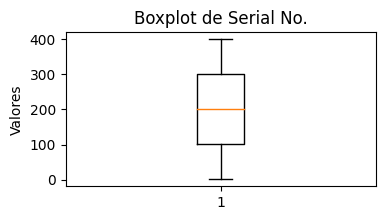

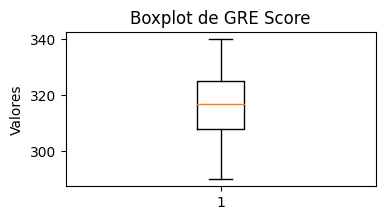

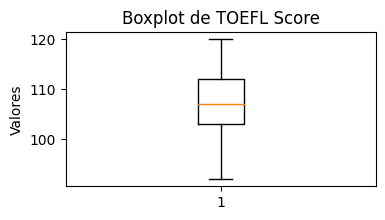

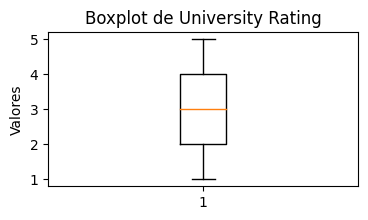

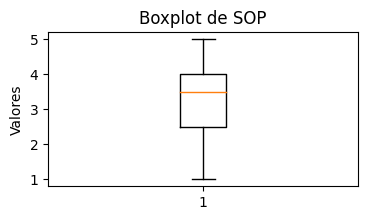

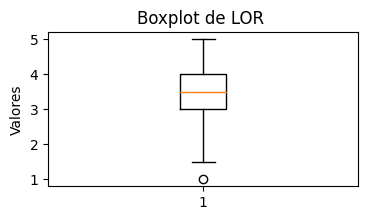

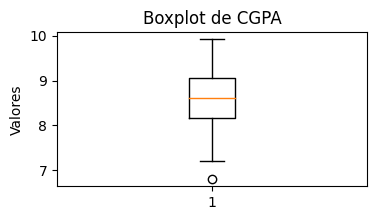

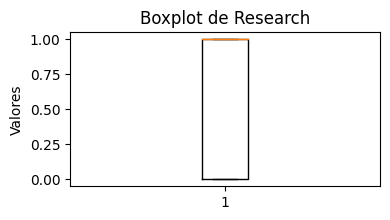

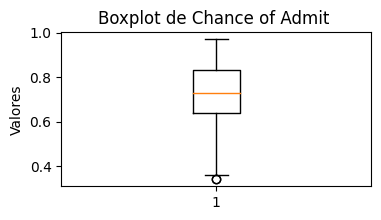

In [ ]:
for column in dataset.columns:
    plt.figure(figsize=(4, 2))
    plt.boxplot(dataset[column])
    plt.title('Boxplot de {}'.format(column))
    plt.ylabel('Valores')
    plt.show()

Observando graficamente a distribuição de cada atributo.


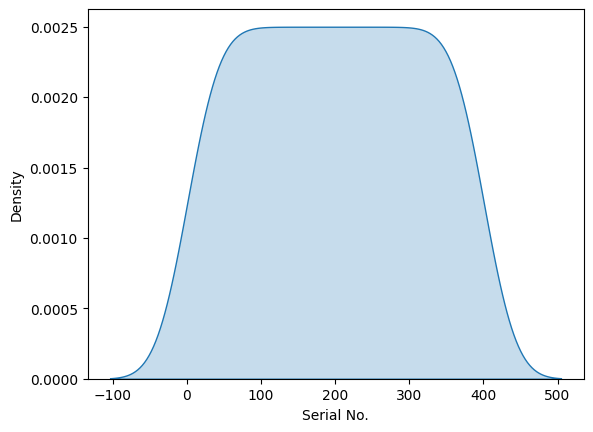

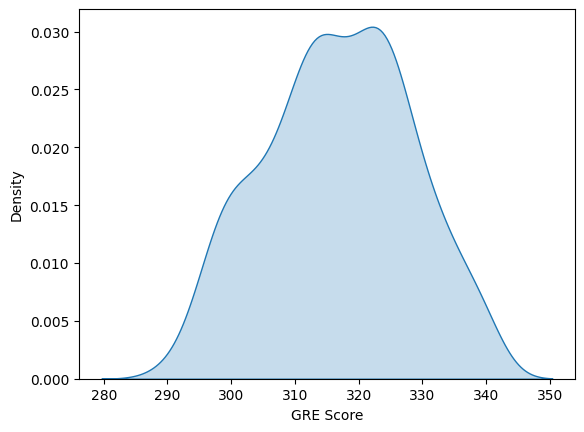

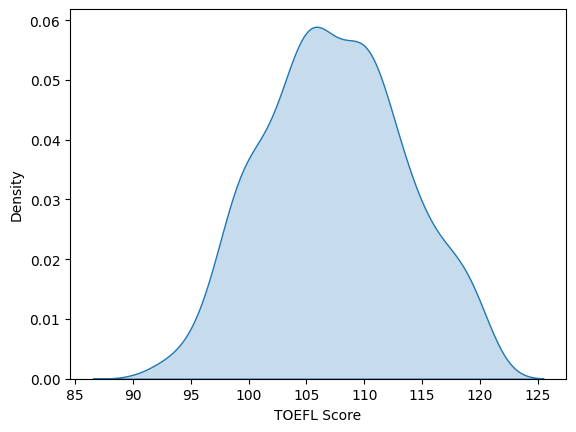

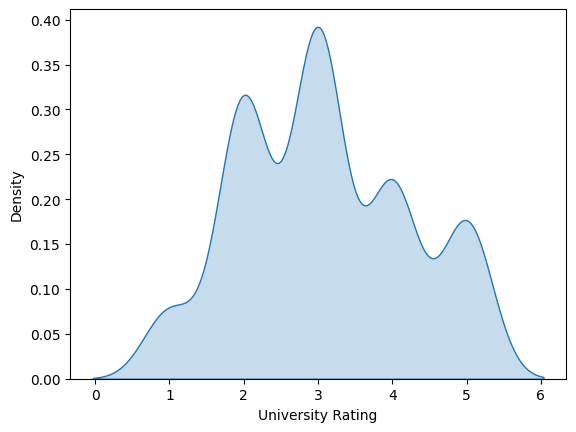

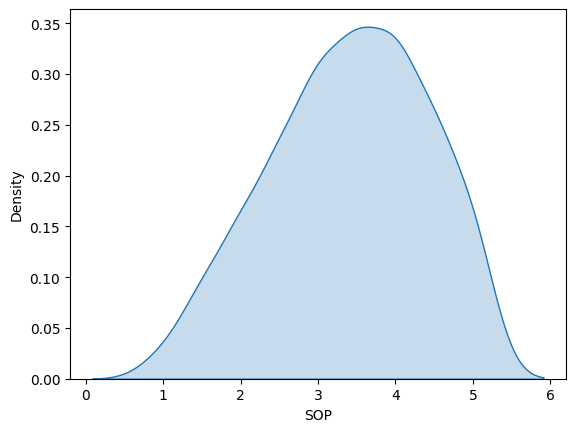

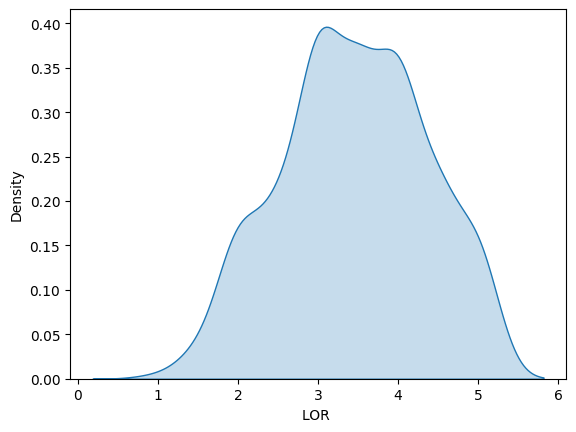

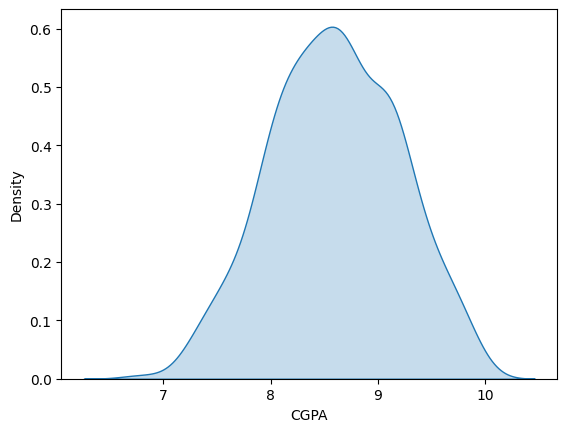

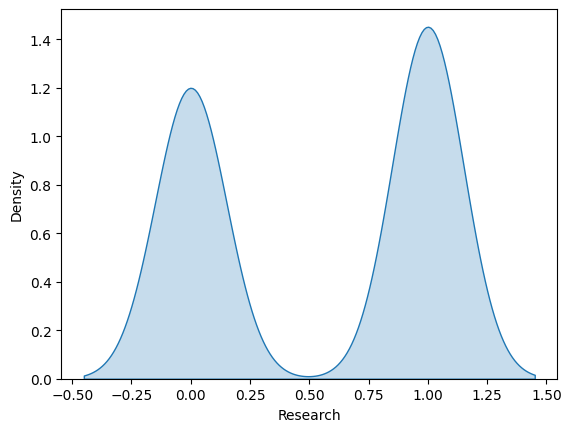

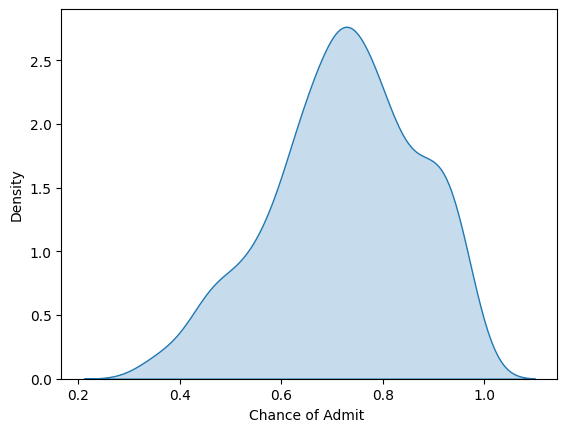

In [ ]:
for column in dataset.columns:
  sb.kdeplot(dataset[column], fill=True)
  plt.show()

Gráfico de Dispersão

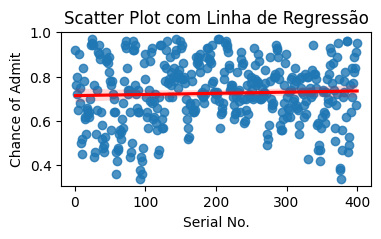

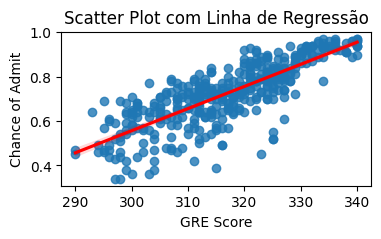

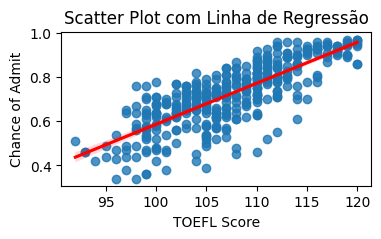

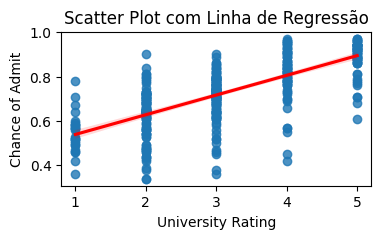

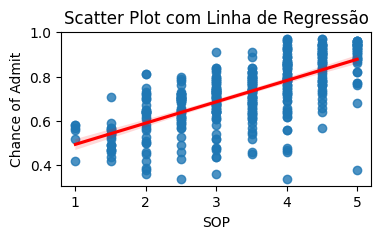

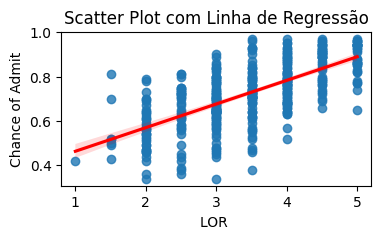

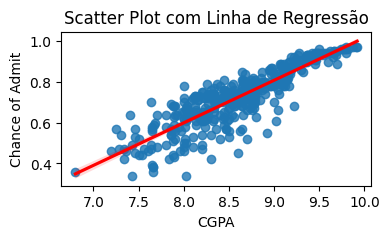

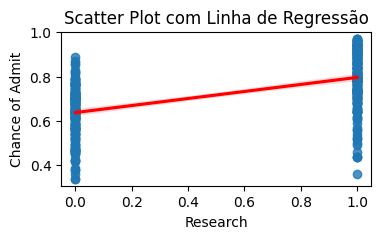

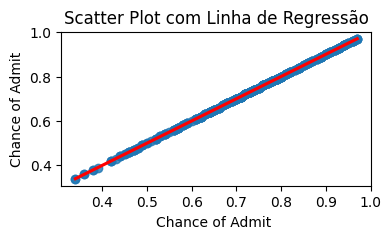

In [ ]:
for column in dataset.columns:
  plt.figure(figsize=(4, 2))
  sb.regplot(x= column, y= dataset["Chance of Admit "], data=dataset, line_kws={'color': 'red'})
  plt.xlabel(column)
  plt.ylabel("Chance of Admit")
  plt.title('Scatter Plot com Linha de Regressão')
  plt.show()


##Preprocessamento e limpeza dos dados

In [ ]:
#Verificando se há valores nulos
dataset.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

A coluna Serial No. foi excluída pois ela servia apenas como índice.

In [ ]:
dataset = dataset.drop("Serial No.", axis=1)
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
dataset['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

##Separando features e target

In [ ]:
y = dataset['Chance of Admit ']
x = dataset.drop("Chance of Admit ", axis = 1)

In [ ]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


Normalizando os dados

Ajustando os valores das variáveis para uma escala comum(0-1), evitando que uma variável com uma escala maior domine o modelo, garantindo que todas as variáveis contribuam igualmente para o treinamento.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
scaled = min_max.fit_transform(x)
x = pd.DataFrame(scaled)
x

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0


**Verificando a correlação entre as variáveis.**

Foi utilizada a correlação de Person para avaliar o relacionamento entre os features e o label. Consideremos uma forte correlação para valores próximos a um(1) e uma fraca correlação para os valores próximos a (0).

Fórmula do cálculo da correlação:

$$ r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}} $$

$r$ é o coeficiente de correlação de Pearson.

$n$ é o número de pares de observações.

$x_i$ e $y_i$ são as observações nas amostras x e y, respectivamente.

$\bar{x}$ e $\bar{y}$ são médias de x e y, respectivamente.


<function matplotlib.pyplot.show(close=None, block=None)>

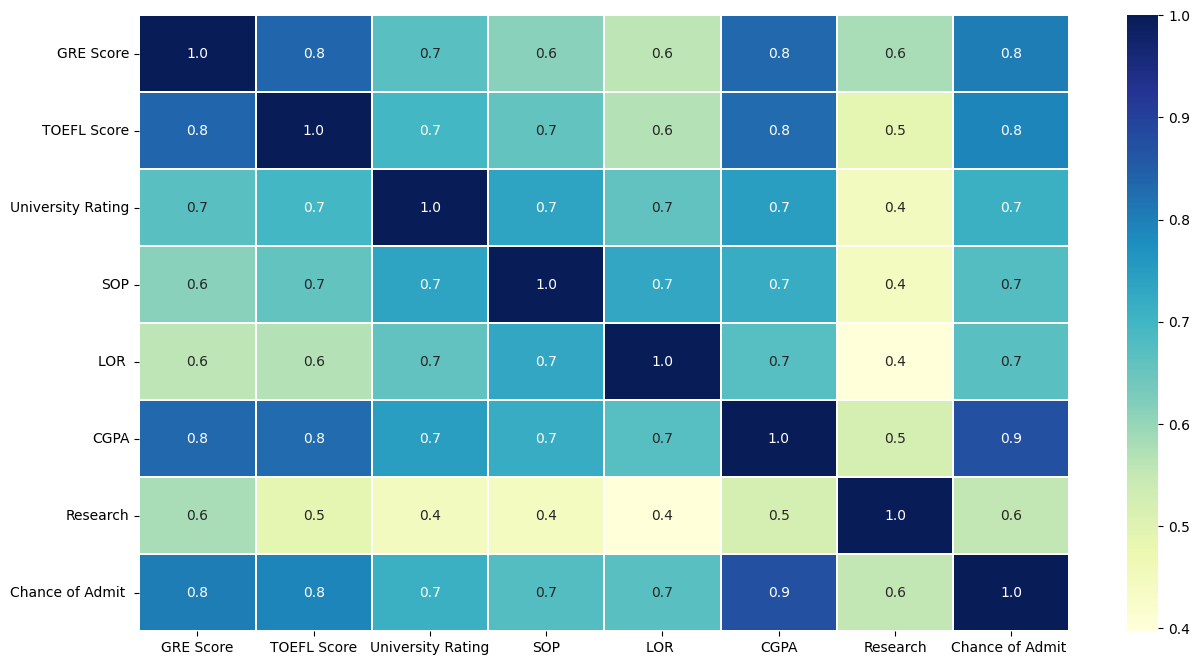

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
correlacao = dataset.corr()
plt.figure(figsize=(15, 8))
matriz_c = sb.heatmap(correlacao, annot = True, fmt=".1f",cmap="YlGnBu", linewidths=0.25)
plt.show

##Separação em treinamento e teste

Será adotada a proporção de 70% para treinamento e 30% para testes

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


##Instanciação dos modelos e treinamento

Modelos que serão utilizados:

- Regressão Linear

- Árvore de Decisão

- Rede Neural de múltiplas camadas

Bônus

- Random Forest

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
linear_reg = LinearRegression()
arv1 = DecisionTreeRegressor(criterion="squared_error", max_depth=5)
arv2 = DecisionTreeRegressor(criterion="friedman_mse")
mlpr1 = MLPRegressor(hidden_layer_sizes=(20,10),activation="logistic", early_stopping=True, max_iter=300, tol=1e-4, verbose=True)
mlpr2 = MLPRegressor(hidden_layer_sizes=(20,10),activation="relu", early_stopping=True, max_iter=300, tol=1e-4, verbose=True)
forest = RandomForestRegressor(n_estimators=100, criterion="squared_error")

####Sobre os Hiperparâmetros das redes Neurais de Múltiplas camadas


**hidden_layer_sizes**- Utilizamos 20 neurõnios na primeira camada oculta e 10 neurônios na segunda camada oculta.

**activation**- Para função de ativação utilizamos a função logística( ou sigmóide) e a função relu(unidade linear retificadora) ambas amplamente utilizadas em Machine Learning.

___________________________________
Sigmóide: $ f(x) = 1/(1+ e^{-x})$       

Relu: $f(x) = max(0, x)$
___________________________________

 **early_stopping**- Quando ativado permite a parada antecipada, ou seja, o treinamento é interrompido quando não houver melhoria na pontuação de validação. Assim é possível otimizar o custo de processamento.

 **max_iter**- Refere-se a quantidade máxima de iterações.

 **tol**- Quando a perda ou pontuação não melhora com base na tolerância escolhida o algoritmo é interrompido.

 **Verbose**- Quanto ativado permite o acompanhamento dos valores a cada iteração.

Treinamento e predição

In [ ]:
from sklearn import metrics
linear_reg.fit(x_train, y_train)
arv1.fit(x_train, y_train)
arv2.fit(x_train, y_train)
mlpr1.fit(x_train, y_train)
mlpr2.fit(x_train, y_train)
forest.fit(x_train, y_train)

result1 = linear_reg.predict(x_test)
result2 = arv1.predict(x_test)
result3 = arv2.predict(x_test)
result4 = mlpr1.predict(x_test)
result5 = mlpr2.predict(x_test)
result6 = forest.predict(x_test)


Iteration 1, loss = 0.32029020
Validation score: -29.438861
Iteration 2, loss = 0.30316519
Validation score: -27.725948
Iteration 3, loss = 0.28656775
Validation score: -26.069122
Iteration 4, loss = 0.27039111
Validation score: -24.468219
Iteration 5, loss = 0.25485591
Validation score: -22.923175
Iteration 6, loss = 0.23983987
Validation score: -21.436141
Iteration 7, loss = 0.22542564
Validation score: -20.008820
Iteration 8, loss = 0.21153863
Validation score: -18.642612
Iteration 9, loss = 0.19818394
Validation score: -17.336342
Iteration 10, loss = 0.18553918
Validation score: -16.090036
Iteration 11, loss = 0.17334395
Validation score: -14.904927
Iteration 12, loss = 0.16170300
Validation score: -13.777662
Iteration 13, loss = 0.15074087
Validation score: -12.706975
Iteration 14, loss = 0.14015434
Validation score: -11.692340
Iteration 15, loss = 0.13019801
Validation score: -10.729999
Iteration 16, loss = 0.12078481
Validation score: -9.820392
Iteration 17, loss = 0.11191115
Va

##Avaliação dos modelos

Para Avaliação dos modelos será utilizado o Mean Squared Error(MSE) que é dado  pela fórmula:

\begin{equation}
    MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

onde:
\begin{align*}
    &n \text{ é o número total de observações,} \\
    &y_i \text{ são os valores reais,} \\
    &\hat{y}_i \text{ são os valores previstos pelo modelo.}
\end{align*}



In [ ]:
mse_list = []
res1 = metrics.mean_squared_error(result1, y_test)
res2 = metrics.mean_squared_error(result2, y_test)
res3 = metrics.mean_squared_error(result3, y_test)
res4 = metrics.mean_squared_error(result4, y_test)
res5 = metrics.mean_squared_error(result5, y_test)
res6 = metrics.mean_squared_error(result6, y_test)
mse_list.append(round(res1,3))
mse_list.append(round(res2,3))
mse_list.append(round(res3,3))
mse_list.append(round(res4,3))
mse_list.append(round(res5,3))
mse_list.append(round(res6,3))


print("Regressão Linear: ", res1)
print("Tree MSE: ", res2)
print("Tree 2 MSE: ", res3)
print("MLP: ", res4)
print("MLP2: ", res5)
print("Random Forest: ", res6)



Regressão Linear:  0.004377217459382589
Tree MSE:  0.007176407114438121
Tree 2 MSE:  0.010515833333333335
MLP:  0.01385202533545695
MLP2:  0.006765135933908585
Random Forest:  0.0054372253333333275


Visualizando Graficamente o resultado dos modelos

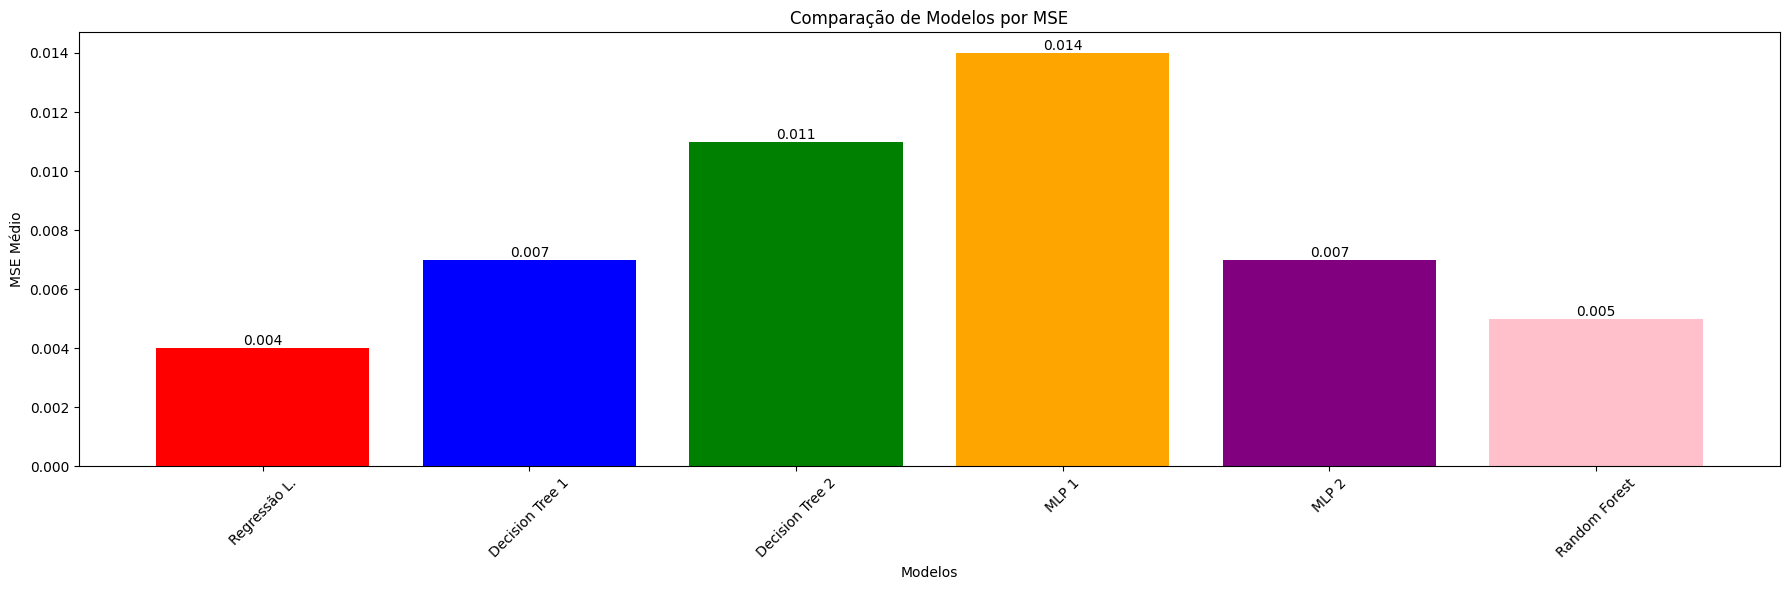

In [ ]:
model_names = ["Regressão L.", "Decision Tree 1", "Decision Tree 2", "MLP 1", "MLP 2", "Random Forest"]

colors = ["red", "blue", "green", "orange", "purple", "pink", "brown", "cyan", "magenta", "yellow", "lime", "teal"]
plt.figure(figsize=(18, 6))
plt.bar(model_names, mse_list, color=colors)
plt.xlabel('Modelos')
plt.ylabel('MSE Médio')
plt.title('Comparação de Modelos por MSE')
plt.xticks(rotation=45)
plt.tight_layout()
for i, v in enumerate(mse_list):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

OBS: Quanto menor o valor do MSE melhor será o desempenho do modelo

#Trabalhando com Aprendizagem Supervisionada- Classificação

Tabela
Possibilidade de chance de admissão

**1 -** Maior chance

**2 -** Pequena chance

**3 -** Chance quase nula

objetivo: Prever as chances de um candidato ser admitido em processo seltivo de mestrado dados um conjunto de atributos

In [ ]:
dataset2 = dataset

intervalos = [0.0, 0.4, 0.8, 1.0]  # Intervalos para Trẽs classes
rotulos = [3, 2, 1]

#função cut para criar a coluna categórica
dataset2['Chance of Admit '] = pd.cut(dataset2['Chance of Admit '], bins=intervalos, labels=rotulos)

dataset2


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,2
2,316,104,3,3.0,3.5,8.00,1,2
3,322,110,3,3.5,2.5,8.67,1,2
4,314,103,2,2.0,3.0,8.21,0,2
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,2


Observando a características de dispersão e distribuição dos dados utilizando como referência a variável target.

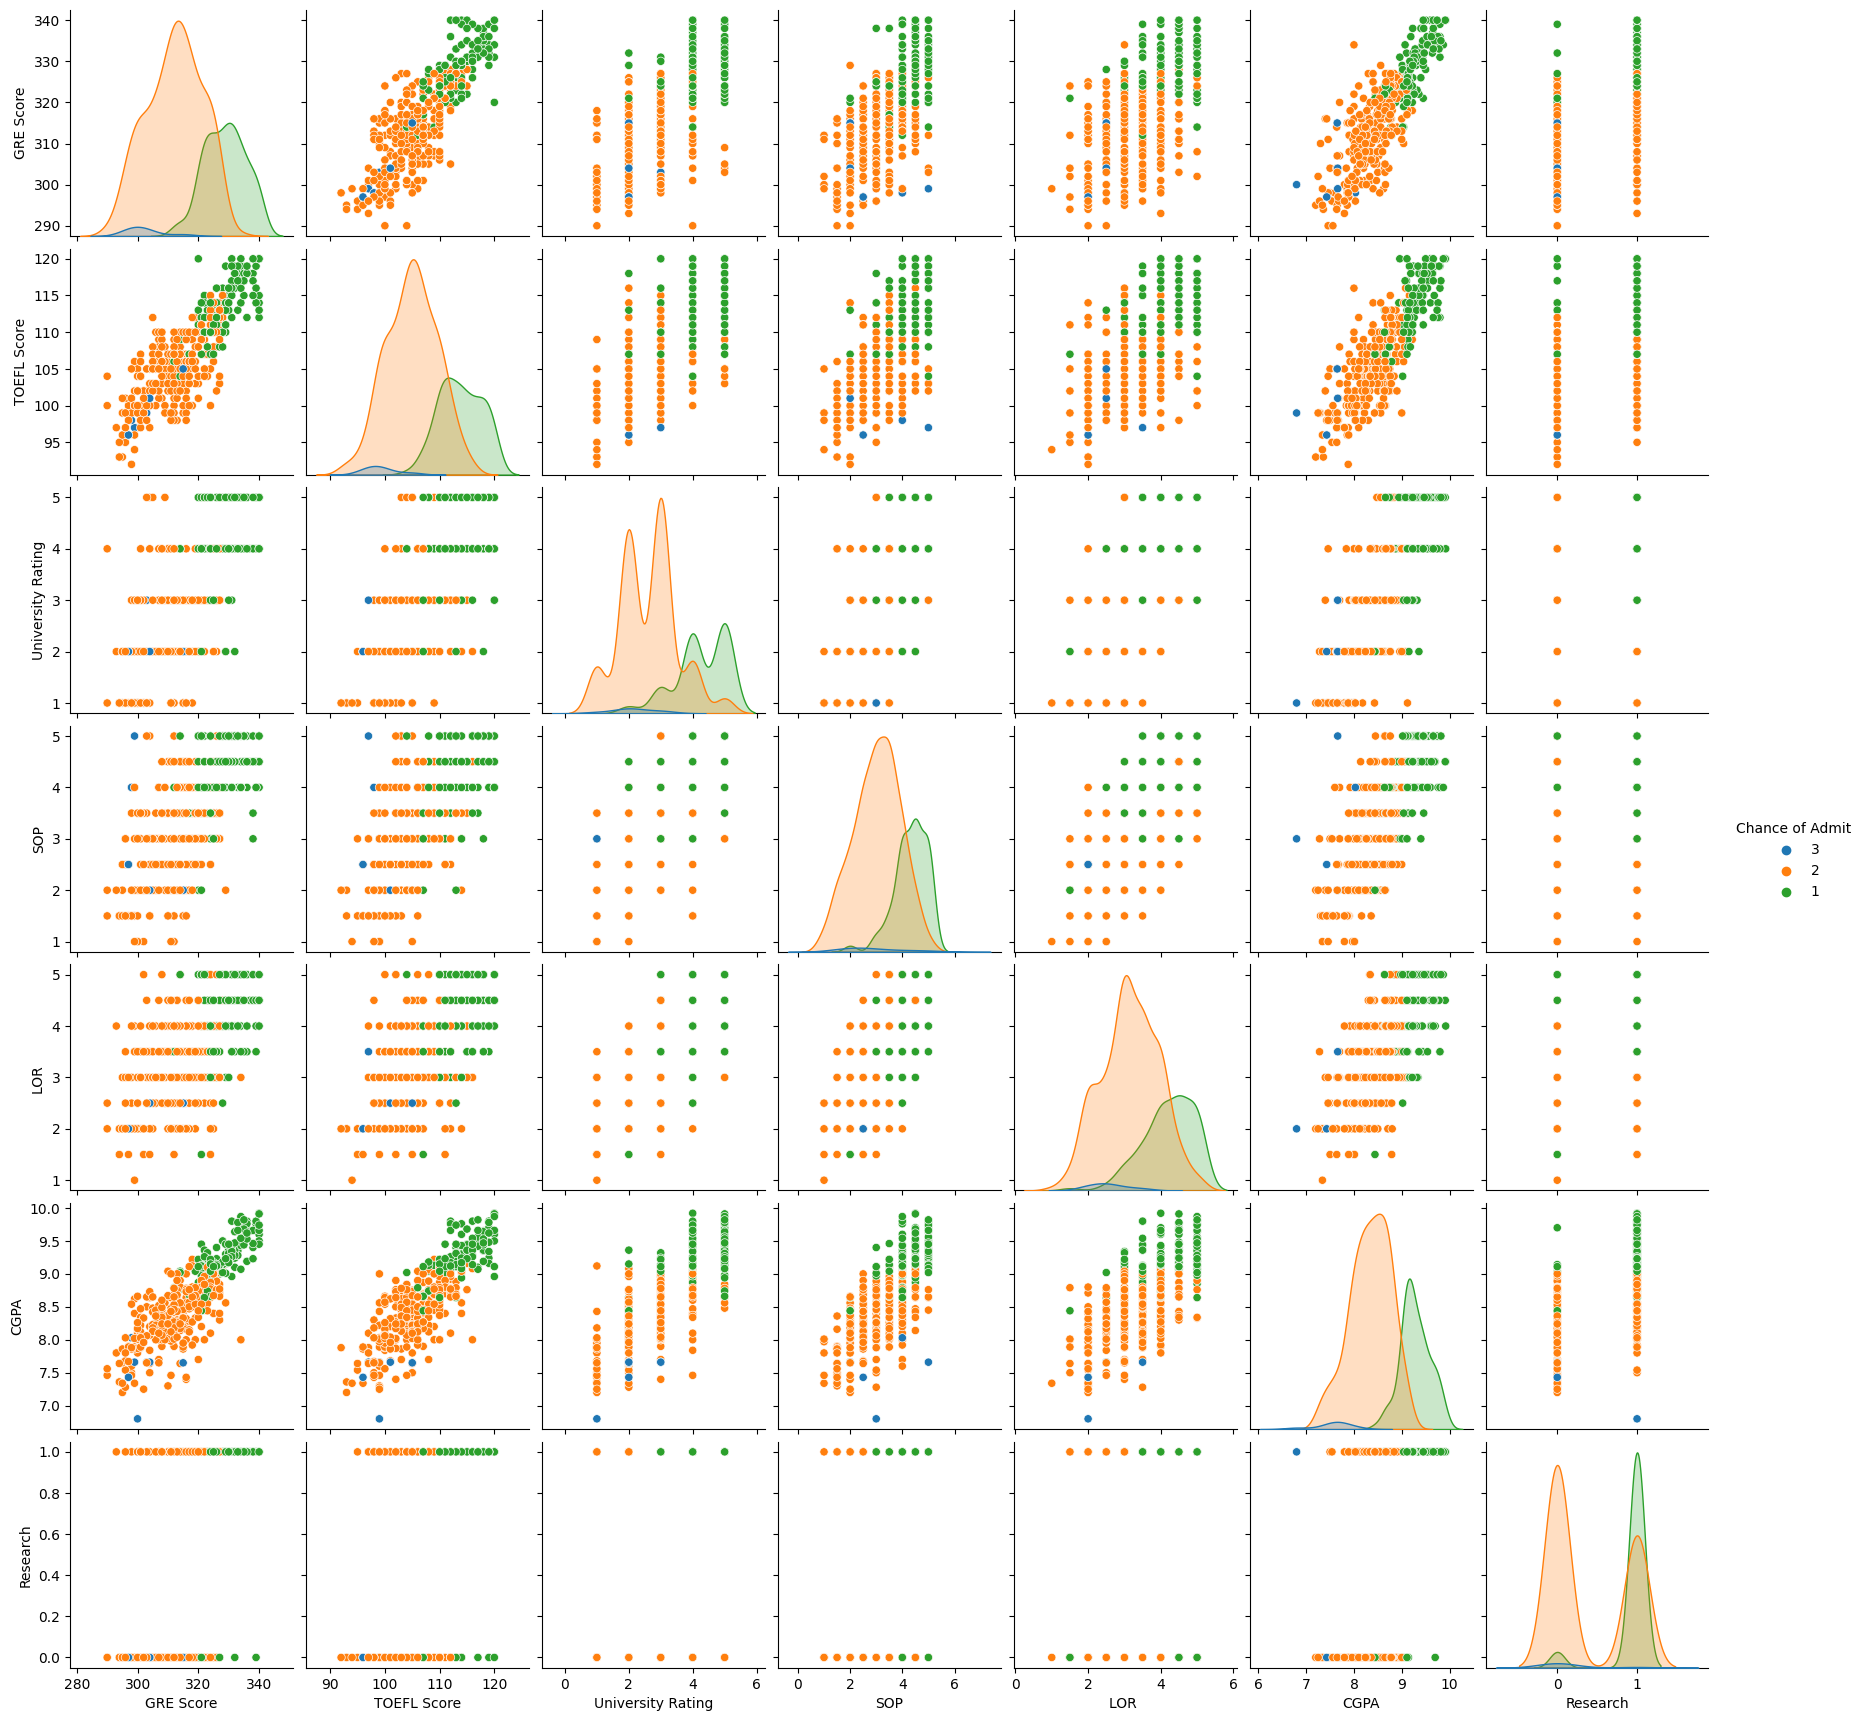

In [ ]:
sb.pairplot(dataset2, hue='Chance of Admit ')

In [ ]:
dataset2['Chance of Admit '].value_counts()

2    276
1    117
3      7
Name: Chance of Admit , dtype: int64

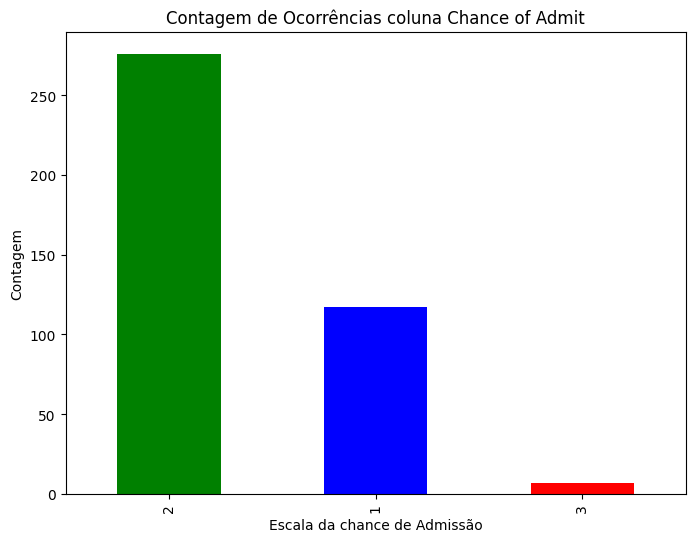

In [ ]:
#grafico de barras para target
contagem = dataset2['Chance of Admit '].value_counts()
plt.figure(figsize=(8, 6))
contagem.plot(kind='bar', color=["green", "blue", "red"])
plt.title('Contagem de Ocorrências coluna Chance of Admit')
plt.xlabel('Escala da chance de Admissão')
plt.ylabel('Contagem')
plt.show()

##Separando features e target

In [ ]:
y = dataset2['Chance of Admit ']
x = dataset2.drop('Chance of Admit ', axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
scaled = min_max.fit_transform(x)
x = pd.DataFrame(scaled)
x

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.625,0.717949,1.0
396,0.70,0.535714,0.50,0.500,0.625,0.740385,1.0
397,0.80,0.857143,0.75,1.000,0.875,0.849359,1.0
398,0.44,0.392857,0.50,0.625,0.750,0.634615,0.0


##Separação em treinamento e teste

Será adotada a proporção de 70% treinamento e 30% testes

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 5)


##Instanciação dos modelos e treinamento

Modelos que serão utilizados:

- Árvore de Decisão

- Rede Neural de múltiplas camadas

Bônus

- Random Forest

- Gradiente Boosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


arv1 = DecisionTreeClassifier(criterion="gini")
mlpc1 = MLPClassifier(hidden_layer_sizes=(20,10), activation='logistic', max_iter=2000, tol=1e-6, verbose=True)
mlpc2 = MLPClassifier(hidden_layer_sizes=(20,10), activation='relu', max_iter=2000, tol=1e-6, verbose=True)
forest = RandomForestClassifier(n_estimators=300, criterion="entropy")
gradiente = GradientBoostingClassifier(n_estimators= 300)

####Sobre os Hiperparâmetros das redes Neurais de Múltiplas camadas


**hidden_layer_sizes**- Utilizamos 20 neurônios na primeira camada oculta e 10 neurônios na segunda camada oculta.

**activation**- Para função de ativação utilizamos a função logística( ou sigmóide) e a função relu(unidade linear retificadora) ambas amplamente utilizadas em Machine Learning.

___________________________________
Sigmóide: $ f(x) = 1/(1+ e^{-x})$       

Relu: $f(x) = max(0, x)$
___________________________________

 **early_stopping**- Quando ativado permite a parada antecipada, ou seja, o treinamento é interrompido quando não houver melhoria na pontuação de validação. Assim é possível otimizar o custo de processamento.

 **max_iter**- Refere-se a quantidade máxima de iterações.

 **tol**- Quando a perda ou pontuação não melhora com base na tolerância escolhida o algoritmo é interrompido.

 **Verbose**- Quanto ativado permite o acompanhamento dos valores a cada iteração.

Treinamento dos modelos

In [ ]:
arv1.fit(x_train, y_train)
mlpc1.fit(x_train, y_train)
mlpc2.fit(x_train, y_train)
forest.fit(x_train, y_train)
gradiente.fit(x_train, y_train)

Iteration 1, loss = 0.99028771
Iteration 2, loss = 0.98012279
Iteration 3, loss = 0.97025152
Iteration 4, loss = 0.96066848
Iteration 5, loss = 0.95121781
Iteration 6, loss = 0.94212643
Iteration 7, loss = 0.93322880
Iteration 8, loss = 0.92471723
Iteration 9, loss = 0.91634842
Iteration 10, loss = 0.90817080
Iteration 11, loss = 0.90050008
Iteration 12, loss = 0.89279948
Iteration 13, loss = 0.88552198
Iteration 14, loss = 0.87855341
Iteration 15, loss = 0.87175828
Iteration 16, loss = 0.86521883
Iteration 17, loss = 0.85879821
Iteration 18, loss = 0.85292712
Iteration 19, loss = 0.84701848
Iteration 20, loss = 0.84129112
Iteration 21, loss = 0.83582790
Iteration 22, loss = 0.83069354
Iteration 23, loss = 0.82567824
Iteration 24, loss = 0.82072216
Iteration 25, loss = 0.81621536
Iteration 26, loss = 0.81192949
Iteration 27, loss = 0.80758070
Iteration 28, loss = 0.80364297
Iteration 29, loss = 0.79971753
Iteration 30, loss = 0.79612038
Iteration 31, loss = 0.79254328
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 89, loss = 0.50263327
Iteration 90, loss = 0.49788604
Iteration 91, loss = 0.49290727
Iteration 92, loss = 0.48825687
Iteration 93, loss = 0.48394601
Iteration 94, loss = 0.47908646
Iteration 95, loss = 0.47488543
Iteration 96, loss = 0.47055016
Iteration 97, loss = 0.46733554
Iteration 98, loss = 0.46412998
Iteration 99, loss = 0.46069274
Iteration 100, loss = 0.45739973
Iteration 101, loss = 0.45431222
Iteration 102, loss = 0.45106625
Iteration 103, loss = 0.44795236
Iteration 104, loss = 0.44467584
Iteration 105, loss = 0.44165845
Iteration 106, loss = 0.43864297
Iteration 107, loss = 0.43567021
Iteration 108, loss = 0.43276806
Iteration 109, loss = 0.42986168
Iteration 110, loss = 0.42714003
Iteration 111, loss = 0.42448619
Iteration 112, loss = 0.42181455
Iteration 113, loss = 0.41949032
Iteration 114, loss = 0.41694528
Iteration 115, loss = 0.41411730
Iteration 116, loss = 0.41173240
Iteration 117, loss = 0.40950164
Iteration 118, loss = 0.40713653
Iteration 119, loss =

GradientBoostingClassifier(n_estimators=300)

##Avaliação dos modelos

Os modelos serão avaliados com base na métrica Acurácia, amplamente utilizada para problemas de Classificação. É dada por:

$$ \text{Acurácia} = \frac{\text{Número de predições corretas}}{\text{Número total de predições}} $$

__________
OBS: para obter a acurácia empercentual basta multiplicar por 100
__________

In [ ]:
from sklearn import metrics
values = []

result1 = arv1.predict(x_test)
result2 = mlpc1.predict(x_test)
result3 = mlpc2.predict(x_test)
result4 = forest.predict(x_test)
result5 = gradiente.predict(x_test)

acc1 = metrics.accuracy_score(result1, y_test)
acc2 = metrics.accuracy_score(result2, y_test)
acc3 = metrics.accuracy_score(result3, y_test)
acc4 = metrics.accuracy_score(result4, y_test)
acc5 = metrics.accuracy_score(result5, y_test)
values.append(round(acc1*100,4))
values.append(round(acc2*100,4))
values.append(round(acc3*100,4))
values.append(round(acc4*100,4))
values.append(round(acc5*100,4))

print("Acurácia dos modelos")
print("Decision tree: ", acc1*100)
print("MLP Classifier 1: ", acc2*100)
print("MLP Classifier 2: ", acc3*100)
print("Random Forest: ", acc4*100)
print("Gradiente Boosting: ", acc5*100)



Acurácia dos modelos
Decision tree:  81.66666666666667
MLP Classifier 1:  89.16666666666667
MLP Classifier 2:  90.0
Random Forest:  90.83333333333333
Gradiente Boosting:  89.16666666666667


Visualizando graficamente os resultados

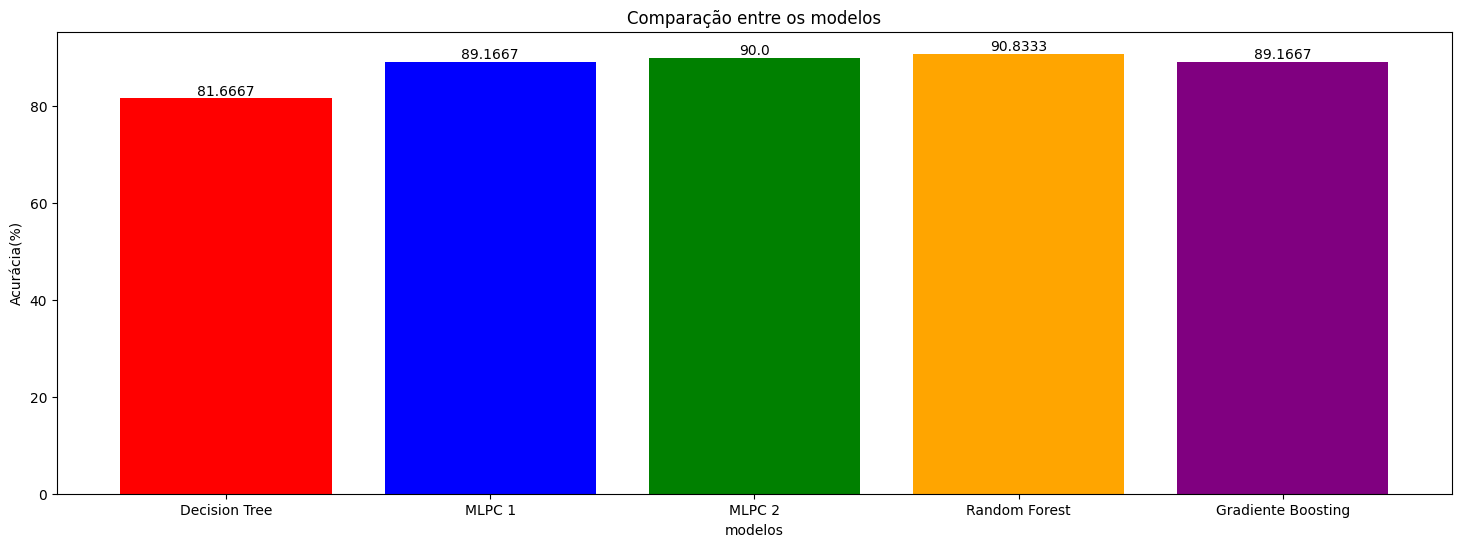

In [ ]:
#comparação entre os modelos
names = ["Decision Tree", "MLPC 1", "MLPC 2", "Random Forest", "Gradiente Boosting"]

colors = ["red", "blue", "green", "orange", "purple", "pink", "brown", "cyan", "magenta", "yellow", "lime", "teal"]

plt.figure(figsize=(18, 6))
plt.bar(names, values, color=colors)
plt.xlabel('modelos')
plt.ylabel('Acurácia(%)')
plt.title("Comparação entre os modelos")
#plt.legend()

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()